## Observations and Insights 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
cmp = mouse_metadata.merge(study_results, on='Mouse ID')
# Display the data table for preview
cmp.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice.
cmp['Mouse ID'].nunique()

249

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cmp[cmp.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
cmp[cmp['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = cmp[cmp['Mouse ID'] != 'g989']
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grp = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']
pd.DataFrame({'mean':grp.mean(),'median':grp.median(),'var':grp.var(),'std':grp.std(),'sem':grp.sem()})

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
grouped_dm = cmp.groupby(["Drug Regimen"]).count()["Mouse ID"]
grouped_dm

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

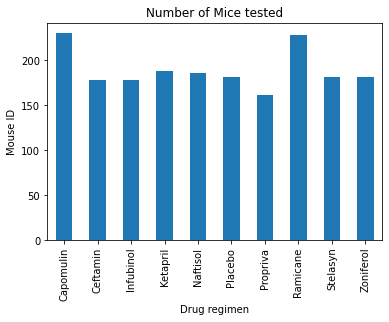

<Figure size 432x288 with 0 Axes>

In [39]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
grouped_dm = cmp.groupby(["Drug Regimen"]).count()["Mouse ID"]
grouped_dm

mice_chart= grouped_dm.plot(kind="bar", title= "Number of Mice tested")
mice_chart.set_xlabel("Drug regimen")
mice_chart.set_ylabel("Mouse ID")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

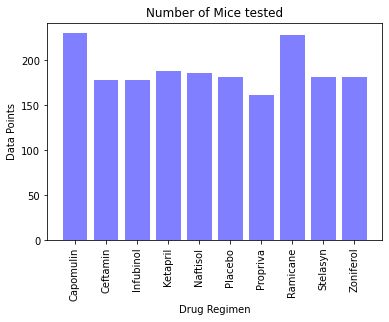

In [40]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
grouped_dm = cmp.groupby(["Drug Regimen"]).count()["Mouse ID"]
grouped_dm
users=[230,178,178,188,186,181,161,228,181,182]
x_axis=np.arange(len(grouped_dm))
plt.bar(x_axis,grouped_dm,color='b', alpha= 0.5, align= "center")
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],  rotation="vertical")
plt.title("Number of Mice tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")


In [41]:
gender=cmp.groupby("Sex").nunique()
print(gender)


        Mouse ID  Drug Regimen  Sex  Age_months  Weight (g)  Timepoint  \
Sex                                                                      
Female       124            10    1          24          14         10   
Male         125            10    1          24          14         10   

        Tumor Volume (mm3)  Metastatic Sites  
Sex                                           
Female                 811                 5  
Male                   834                 5  


In [42]:
gender_list= list(gender.index)
gender_list

['Female', 'Male']

In [43]:
Id_m=[gender["Mouse ID"]]
Id_m

[Sex
 Female    124
 Male      125
 Name: Mouse ID, dtype: int64]

In [44]:
groupby_cmp= cmp.groupby(["Mouse ID","Sex"])
groupby_cmp

mouse_df = pd.DataFrame(groupby_cmp.size())

#Create the dataframe with total count of Female and Male mice
mouse_g = pd.DataFrame(mouse_df.groupby(["Sex"]).count())
mouse_g.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_g["Percentage of Sex"] = (100*(mouse_g["Total Count"]/mouse_g["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_g["Percentage of Sex"] = mouse_g["Percentage of Sex"]

#gender_df
mouse_g

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


<ipython-input-45-5946c19ddc6d>:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis("equal",fontsize = 14)


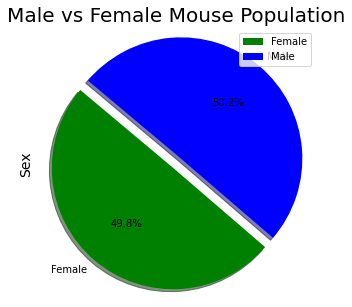

In [45]:


#  Generate a pie plot showing the distribution of female versus male mice us
colors = ['green', 'blue']
explode = (0.1, 0)
plot =mouse_g.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title("Male vs Female Mouse Population",fontsize = 20)
plt.ylabel("Sex",fontsize = 14)
plt.axis("equal",fontsize = 14)

plt.show()


<ipython-input-46-d0e24df77390>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(Id_m,labels=gender_list, colors=colors,autopct="%1.1f%%", shadow=True, startangle=180)


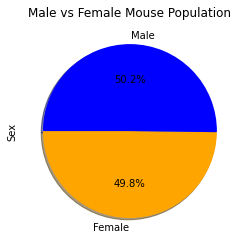

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["orange", "blue"]

plt.pie(Id_m,labels=gender_list, colors=colors,autopct="%1.1f%%", shadow=True, startangle=180)

plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [63]:

#merging drugs, sorting by timepoint
group_drugs=cmp[cmp["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
group_drugs = group_drugs.sort_values(["Timepoint"], ascending=True)
group_drugs
#establishing columns
group_drugs = group_drugs[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
group_drugs


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


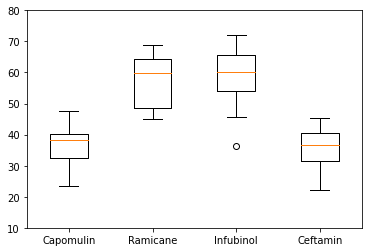

In [74]:
#grouping the last of Drug Regimen, Mouse ID and Tumor Volume (mm3)

sort_drugs =group_drugs.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
sort_drugs.head()

group_drugs = sort_drugs.to_frame()
group_drugs


all_drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

final_df = group_drugs.reset_index()
final_group = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(final_group)
tumor_list_df = tumor_df.reindex(all_drugs)
tumor_vols = [vol for vol in tumor_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=all_drugs)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [48]:
# Generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = cmp.loc[cmp["Mouse ID"] == "s185",:]
Capomulin_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


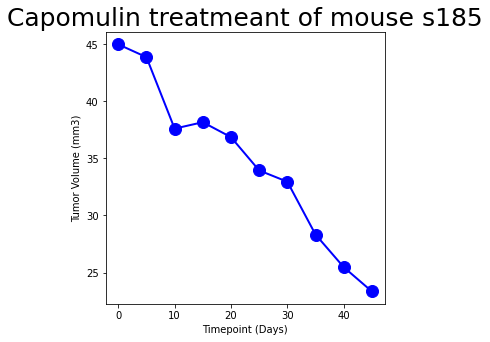

In [49]:
x_axis = Capomulin_df["Timepoint"]
y_value = Capomulin_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(5, 5))
plt.title('Capomulin treatmeant of mouse s185',fontsize =25)
plt.plot(x_axis, y_value,linewidth=2, markersize=12,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =10)
plt.ylabel('Tumor Volume (mm3)',fontsize =10)



plt.show()

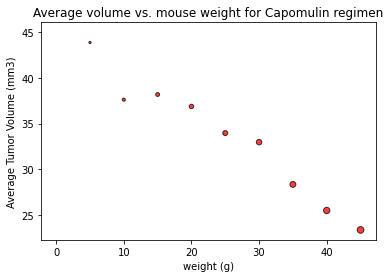

In [50]:
# Generating a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = Capomulin_df["Timepoint"]
tumor_v = Capomulin_df["Tumor Volume (mm3)"]


plt.scatter(x_axis, tumor_v, marker="o", facecolors="red", edgecolors="black",s=x_axis, alpha=0.75)
plt.title("Average volume vs. mouse weight for Capomulin regimen")
plt.xlabel("weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [52]:
x_axis = Capomulin_df["Timepoint"]
tumor_v = Capomulin_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,tumor_v)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average  (Tumor Volume (mm3)')
plt.show()

NameError: name 'linregress' is not defined